## Particle Swarm Optimization Test

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pso

## PSO

#### Defining function which will be optimized

In [2]:
def function_to_optimize(x):
    # rosenbrock
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

#### Defining initial spawn area for population

In [3]:
spawn_area=np.array([[-5, 5], [-5, 5]])

#### PSO with Bare Bones

In [4]:
pso_bb=pso.ParticleSwarm(spawn_area=spawn_area, update_function="bare_bones")

best_pop_bb, best_eval_bb=pso_bb.optimize(function_to_optimize, n_iterations=600, n_dims=2)

Generation 0: best pop=[ 0.80291517 -1.38800196], value=413.2154992515525
Generation 1: best pop=[ 0.13760518 -0.20194859], value=5.6226890452025335
Generation 2: best pop=[1.12397651 1.31985202], value=0.3349211363277181
Generation 3: best pop=[1.12397651 1.31985202], value=0.3349211363277181
Generation 4: best pop=[1.19839853 1.44677355], value=0.05062876181845152
Generation 5: best pop=[1.19839853 1.44677355], value=0.05062876181845152
Generation 6: best pop=[1.19839853 1.44677355], value=0.05062876181845152
Generation 7: best pop=[1.19839853 1.44677355], value=0.05062876181845152
Generation 8: best pop=[1.19839853 1.44677355], value=0.05062876181845152
Generation 9: best pop=[1.19631236 1.4260487 ], value=0.041154413800366774
Generation 10: best pop=[1.19631236 1.4260487 ], value=0.041154413800366774
Generation 11: best pop=[1.19631236 1.4260487 ], value=0.041154413800366774
Generation 12: best pop=[1.19631236 1.4260487 ], value=0.041154413800366774
Generation 13: best pop=[1.19639

#### PSO with Canonical Variant

In [5]:
pso_canonical=pso.ParticleSwarm(spawn_area=spawn_area, update_function="canonical")

best_pop_canonical, best_eval_canonical=pso_canonical.optimize(function_to_optimize, n_iterations=600, n_dims=2)

Generation 0: best pop=[-1.59823313  3.20922396], value=49.63691793931753
Generation 1: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 2: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 3: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 4: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 5: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 6: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 7: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 8: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 9: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 10: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 11: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 12: best pop=[0.15497406 0.0199288 ], value=0.7157401467469483
Generation 13: best pop=[0.15497406 0.0199288 ]

In [6]:
history_bb=pso_bb.get_history()
history_canonical=pso_canonical.get_history()

## Plotting results

#### Defining area to plot

In [7]:
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)

#### Combinations

In [8]:
combinations = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

#### Applying function

In [9]:
z=np.apply_along_axis(function_to_optimize, 1, combinations)

#### Reshaping z to be able to use contour plot

In [10]:
zz=z.reshape(-1, len(x)).T

#### Plotting results

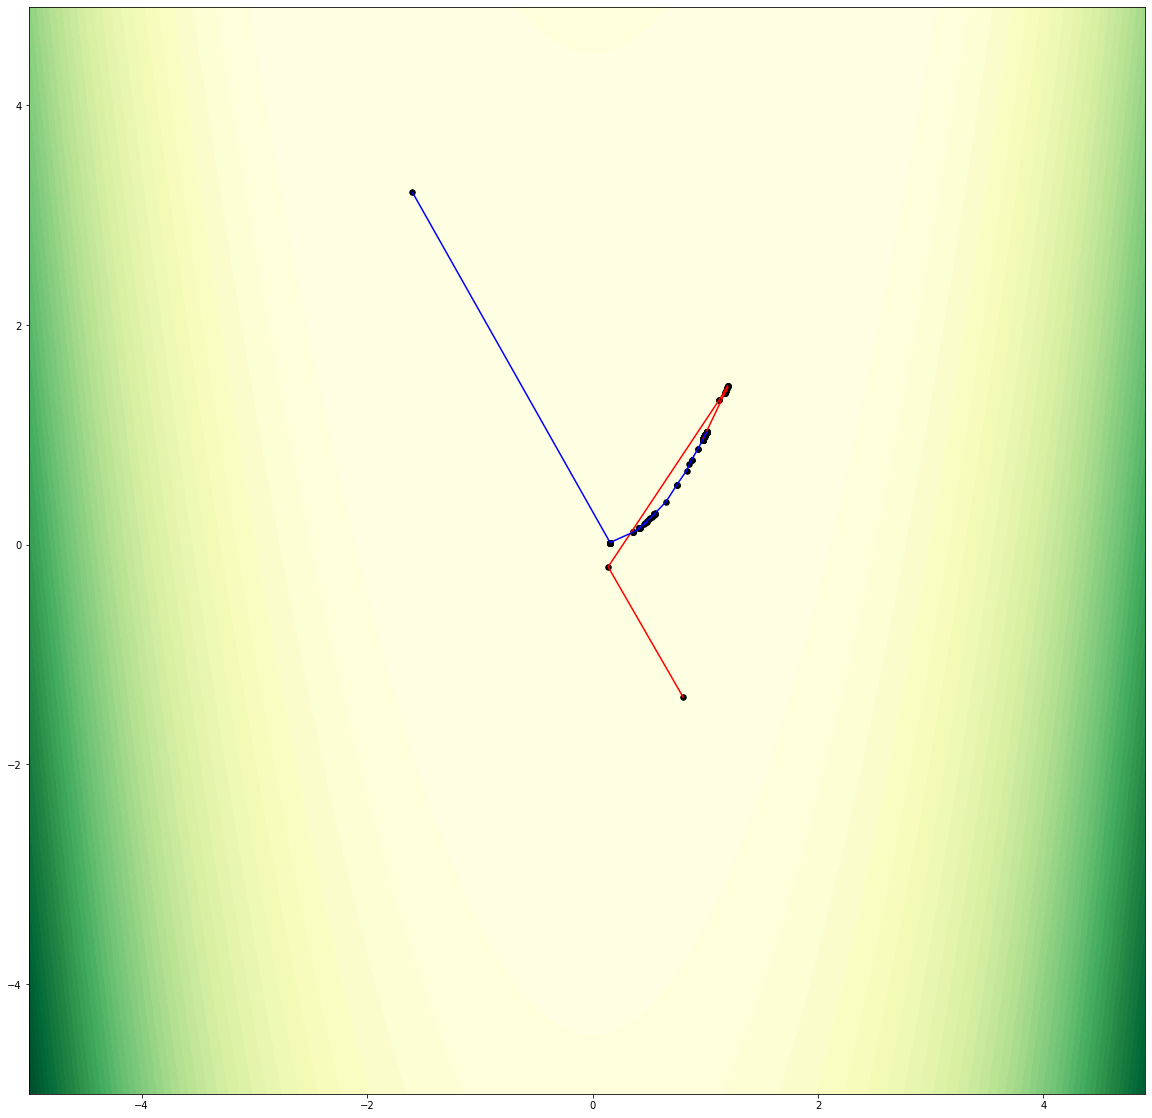

In [11]:
# plot area
plt.figure(figsize=(20, 20))
plt.contourf(x, y, zz, 50, cmap="YlGn")

# plot history for bare bones
plt.plot(history_bb[:,0], history_bb[:,1], c='red')
plt.scatter(history_bb[:,0], history_bb[:,1], c='black', s=30)

# plot history for canonical
plt.plot(history_canonical[:,0], history_canonical[:,1], c='blue')
plt.scatter(history_canonical[:,0], history_canonical[:,1], c='black', s=30)

## Results

In [12]:
print(f"Bare bones: Best value={best_eval_bb}, Coordinates={best_pop_bb}")
print(f"Canonical: Best value={best_eval_canonical}, Coordinates={best_pop_canonical}")

Bare bones: Best value=2.220723304437827e-08, Coordinates=[0.99985098 0.99970201]
Canonical: Best value=0.0, Coordinates=[1. 1.]
